In this Kernel we will try to explore the movie data set and develop a movie recomender system.This Kernel is a work in process and if you like my work please do vote.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
movie_titles_df=pd.read_csv('../input/movie-titles/Movie_Id_Titles')
movie_titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
movie_titles_df.shape

(1682, 2)

We have 1682 movies in our dataset

In [4]:
column_names=['user_id','item_id','rating','timestamp']
movies_rating_df =pd.read_csv('../input/movielens/u.data.csv',sep='\t',names=column_names)

movies_rating_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movies_rating_df.shape

(100000, 4)

We have once lakh customer reviews in the data set.Movies are rated on a scale of 1-5.Time stamp data is not useful for our analysis so we can drop it from our dataset

In [6]:
movies_rating_df.drop(['timestamp'],axis=1,inplace=True)

In [7]:
movies_rating_df.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [8]:
movies_rating_df.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


We can see that the minimum rating is 1 and maximum is 5 with an average of 3.52

In [9]:
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
user_id    100000 non-null int64
item_id    100000 non-null int64
rating     100000 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


There are no null values in the dataset.So no data cleanup is needed

**Merging both the dataframes together**

In [10]:
movies_rating_df=pd.merge(movies_rating_df,movie_titles_df,on='item_id')

In [11]:
movies_rating_df.head()

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [12]:
movies_rating_df.shape

(100000, 4)

**Vizualize the dataset**

In [13]:
movies_rating_df.groupby('title').describe()

item_id   ...   user_id
                                                     count   ...       max
title                                                        ...          
'Til There Was You (1997)                              9.0   ...     782.0
1-900 (1994)                                           5.0   ...     833.0
101 Dalmatians (1996)                                109.0   ...     938.0
12 Angry Men (1957)                                  125.0   ...     932.0
187 (1997)                                            41.0   ...     894.0
2 Days in the Valley (1996)                           93.0   ...     943.0
20,000 Leagues Under the Sea (1954)                   72.0   ...     932.0
2001: A Space Odyssey (1968)                         259.0   ...     942.0
3 Ninjas: High Noon At Mega Mountain (1998)            5.0   ...     609.0
39 Steps, The (1935)                                  59.0   ...     942.0
8 1/2 (1963)                                          38.0   ...     932.0
8 Heads in a Duffel Bag (1997)                         4.0   ...     880.0
8 Seconds (1994)                                       4.0   ...     551.0
A Chef in Love (1996)                                  8.0   ...     894.0
Above the Rim (1994)                                   5.0   ...     749.0
Absolute Power (1997)                                127.0   ...     938.0
Abyss, The (1989)                                    151.0   ...     940.0
Ace Ventura: Pet Detective (1994)                    103.0   ...     943.0
Ace Ventura: When Nature Calls (1995)                 37.0   ...     886.0
Across the Sea of Time (1995)                          4.0   ...     854.0
Addams Family Values (1993)                           87.0   ...     943.0
Addicted to Love (1997)                               54.0   ...     936.0
Addiction, The (1995)                                 11.0   ...     916.0
Adventures of Pinocchio, The (1996)                   39.0   ...     921.0
Adventures of Priscilla, Queen of the Desert, T...   111.0   ...     940.0
Adventures of Robin Hood, The (1938)                  67.0   ...     932.0
Affair to Remember, An (1957)                         26.0   ...     896.0
African Queen, The (1951)                            152.0   ...     942.0
Afterglow (1997)                                      18.0   ...     894.0
Age of Innocence, The (1993)                          65.0   ...     916.0
...                                                    ...   ...       ...
Window to Paris (1994)                                 1.0   ...     279.0
Wings of Courage (1995)                                1.0   ...     308.0
Wings of Desire (1987)                                57.0   ...     916.0
Wings of the Dove, The (1997)                         75.0   ...     920.0
Winnie the Pooh and the Blustery Day (1968)           75.0   ...     942.0
Winter Guest, The (1997)                               9.0   ...     848.0
Wishmaster (1997)                                     27.0   ...     919.0
With Honors (1994)                                    46.0   ...     943.0
Withnail and I (1987)                                 13.0   ...     894.0
Witness (1985)                                         1.0   ...     339.0
Wizard of Oz, The (1939)                             246.0   ...     943.0
Wolf (1994)                                           67.0   ...     943.0
Woman in Question, The (1950)                          1.0   ...     405.0
Women, The (1939)                                     15.0   ...     918.0
Wonderful, Horrible Life of Leni Riefenstahl, T...    10.0   ...     924.0
Wonderland (1997)                                     10.0   ...     871.0
Wooden Man's Bride, The (Wu Kui) (1994)                3.0   ...     936.0
World of Apu, The (Apur Sansar) (1959)                 6.0   ...     932.0
Wrong Trousers, The (1993)                           118.0   ...     932.0
Wyatt Earp (1994)                                     50.0   ...     943.0
Y

item_id and user_id can be removed to go the describe for the data

In [14]:
movies_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.00,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.00,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.00,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.00,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.00,5.0
2 Days in the Valley (1996),93.0,3.225806,0.957000,1.0,3.00,3.0,4.00,5.0
"20,000 Leagues Under the Sea (1954)",72.0,3.500000,0.731581,2.0,3.00,4.0,4.00,5.0
2001: A Space Odyssey (1968),259.0,3.969112,1.026307,1.0,3.00,4.0,5.00,5.0
3 Ninjas: High Noon At Mega Mountain (1998),5.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [15]:
rating_df_mean=movies_rating_df.groupby('title')['rating'].describe()['mean']

In [16]:
rating_df_mean.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: mean, dtype: float64

In [17]:
rating_df_count=movies_rating_df.groupby('title')['rating'].describe()['count']

In [18]:
rating_df_count.head()

title
'Til There Was You (1997)      9.0
1-900 (1994)                   5.0
101 Dalmatians (1996)        109.0
12 Angry Men (1957)          125.0
187 (1997)                    41.0
Name: count, dtype: float64

Now we have the dataframes for mean and the count of the rating for the movies 

**Lets Merge the mean and count data of rating**

In [19]:
rating_mean_count_df=pd.concat([rating_df_mean,rating_df_count],axis=1)

In [20]:
rating_mean_count_df.head()

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0


In [21]:
rating_mean_count_df.reset_index().head()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0


So now we have a dataframe with title,mean rating and number of times a movie has been rated.

**Plotting distribution to get better idea**

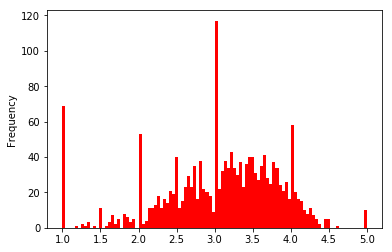

In [22]:
rating_mean_count_df['mean'].plot(bins=100,kind='hist',color='r')
plt.ioff()

It difficult to get 5 start ratings.The movies have higer rating may have few reviews.Lets check this out

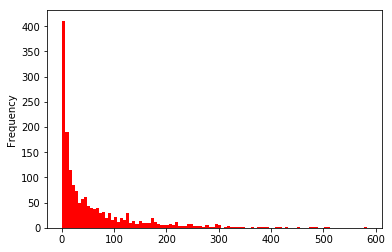

In [23]:
rating_mean_count_df['count'].plot(bins=100,kind='hist',color='r')
plt.ioff()

We can see clearly that the movies with high nummber of ratings are less.Many movies have less than 100 ratings

In [24]:
rating_mean_count_df[rating_mean_count_df['mean']==5]

,mean,count
title,,
Aiqing wansui (1994),5.0,1.0
Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
Prefontaine (1997),5.0,3.0
"Saint of Fort Washington, The (1993)",5.0,2.0
Santa with Muscles (1996),5.0,2.0
Someone Else's America (1995),5.0,1.0
Star Kid (1997),5.0,3.0


We can clearly see that movies with rating 5 have very few people rating it.

**Getting movies with Mix reviews**

In [25]:
rating_mean_count_df.sort_values('count',ascending=False).head(10)

,mean,count
title,,
Star Wars (1977),4.358491,583.0
Contact (1997),3.803536,509.0
Fargo (1996),4.155512,508.0
Return of the Jedi (1983),4.007890,507.0
Liar Liar (1997),3.156701,485.0
"English Patient, The (1996)",3.656965,481.0
Scream (1996),3.441423,478.0
Toy Story (1995),3.878319,452.0
Air Force One (1997),3.631090,431.0


So now we have the list of movies which have been rated most by people 

**Getting the movies with least reviews **

In [26]:
rating_mean_count_df.sort_values('count',ascending=True).head(10)

,mean,count
title,,
Á köldum klaka (Cold Fever) (1994),3.0,1.0
Mille bolle blu (1993),1.0,1.0
Mat' i syn (1997),1.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
"Man from Down Under, The (1943)",1.0,1.0
Mamma Roma (1962),4.0,1.0
Mad Dog Time (1996),3.0,1.0
"Big Bang Theory, The (1994)",4.0,1.0
MURDER and murder (1996),2.0,1.0


**Item Based Collabrative filtering **

In [27]:
movies_rating_df.head()

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


**We will create a matrix using Pivot table**

In [28]:
userid_movietitle_matrix=movies_rating_df.pivot_table(index='user_id',columns='title',values='rating')
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3

This matrix gives us the the rating everu customer has given for the movie he or her has watched.

**Getting the details for a particular movie**

In [29]:
titanic=userid_movietitle_matrix['Titanic (1997)']
titanic

user_id
1      NaN
2      5.0
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     4.0
14     2.0
15     NaN
16     NaN
17     NaN
18     NaN
19     2.0
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     5.0
27     NaN
28     NaN
29     NaN
30     5.0
      ... 
914    3.0
915    4.0
916    NaN
917    NaN
918    NaN
919    5.0
920    5.0
921    5.0
922    NaN
923    NaN
924    4.0
925    NaN
926    3.0
927    NaN
928    NaN
929    NaN
930    NaN
931    4.0
932    NaN
933    NaN
934    3.0
935    5.0
936    4.0
937    NaN
938    5.0
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 943, dtype: float64

So we can see the ratings for titanic movie given by different users 

**Creating correlations **

In [30]:
titanic_correlations=pd.DataFrame(userid_movietitle_matrix.corrwith(titanic),columns=['Correlations'])
titanic_correlations

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlations
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
2 Days in the Valley (1996),0.017295
"20,000 Leagues Under the Sea (1954)",0.246718
2001: A Space Odyssey (1968),-0.042024
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [31]:
titanic_correlations=titanic_correlations.join(rating_mean_count_df['count'])
titanic_correlations

,Correlations,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
"20,000 Leagues Under the Sea (1954)",0.246718,72.0
2001: A Space Odyssey (1968),-0.042024,259.0
3 Ninjas: High Noon At Mega Mountain (1998),NaN,5.0


**Drop Nan**

In [32]:
titanic_correlations.dropna(inplace=True)
titanic_correlations

,Correlations,count
title,,
'Til There Was You (1997),-0.062017,9.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
"20,000 Leagues Under the Sea (1954)",0.246718,72.0
2001: A Space Odyssey (1968),-0.042024,259.0
"39 Steps, The (1935)",0.155752,59.0
8 1/2 (1963),-0.039301,38.0


In [33]:
titanic_correlations.sort_values('Correlations',ascending=False).head(100)

,Correlations,count
title,,
Nadja (1994),1.000000,8.0
"Pest, The (1997)",1.000000,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.000000,3.0
For Ever Mozart (1996),1.000000,3.0
"Jerky Boys, The (1994)",1.000000,3.0
"Newton Boys, The (1998)",1.000000,4.0
Hearts and Minds (1996),1.000000,5.0
"Simple Wish, A (1997)",1.000000,3.0
Purple Noon (1960),1.000000,7.0


In [34]:
titanic_correlations[titanic_correlations['count']>80].sort_values('Correlations',ascending=False).head(10)

,Correlations,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
William Shakespeare's Romeo and Juliet (1996),0.430243,106.0
"Last of the Mohicans, The (1992)",0.427239,128.0
Outbreak (1995),0.426237,104.0
Demolition Man (1993),0.411489,92.0


**Lets create item based collabarative filtering for whole dataset**

In [35]:
movie_correlations=userid_movietitle_matrix.corr(method='pearson',min_periods=80)
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.178848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [36]:
myRatings = pd.read_csv("../input/my-movie-rating/My_Ratings.csv")
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [37]:
myRatings['Movie Name'][0]

'Liar Liar (1997)'

In [38]:
similar_movies_list=pd.Series()
for i in range(0,2):
    similar_movie=movie_correlations[myRatings['Movie Name'][i]].dropna()
    similar_movie=similar_movie.map(lambda x: x* myRatings['Ratings'][i])
    similar_movie_list=similar_movies_list.append(similar_movie)

In [39]:
 similar_movie_list.sort_values(inplace=True,ascending=False)
 similar_movie_list.head(10)

Star Wars (1977)                                      1.000000
Empire Strikes Back, The (1980)                       0.747981
Return of the Jedi (1983)                             0.672556
Raiders of the Lost Ark (1981)                        0.536117
Austin Powers: International Man of Mystery (1997)    0.377433
Sting, The (1973)                                     0.367538
Indiana Jones and the Last Crusade (1989)             0.350107
Pinocchio (1940)                                      0.347868
Frighteners, The (1996)                               0.332729
L.A. Confidential (1997)                              0.319065
dtype: float64